# Exploratory Data Analysis (EDA)

This notebook explores the flight price dataset. 
The goal is to inform preprocessing and modeling decisions in later stages.

## 1. Import Libraries & Load Data

In [17]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

PROJECT_ROOT = Path("..")
RAW_PATH = PROJECT_ROOT / "data" / "raw" / "data.xlsx"

data = pd.read_excel(RAW_PATH)

In [18]:
data.shape

(10683, 11)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## 2. Target Variable: Flight Price

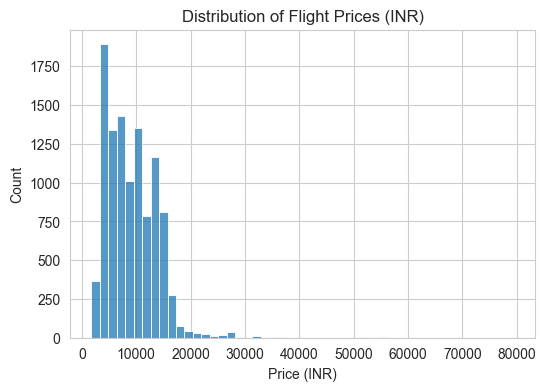

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(data["Price"], bins=50)
plt.title("Distribution of Flight Prices (INR)")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

## 3. Categorical Variables Overview

- Airline

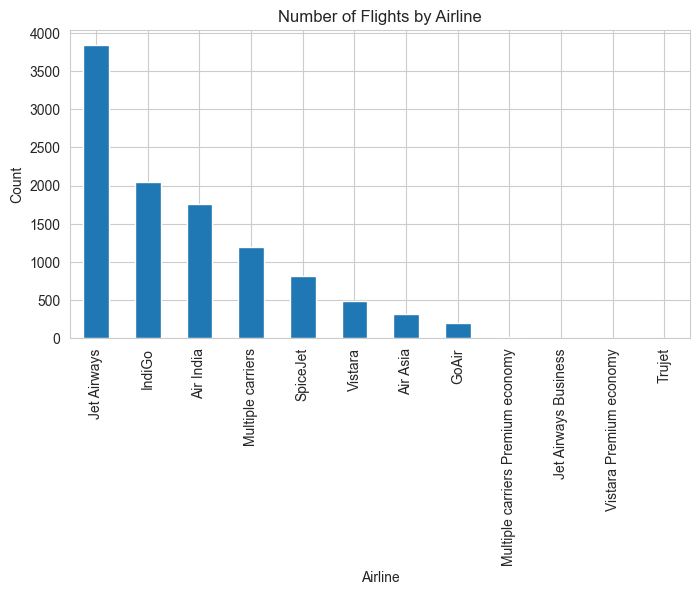

In [5]:
plt.figure(figsize=(8,4))
data["Airline"].value_counts().plot(kind="bar")
plt.title("Number of Flights by Airline")
plt.ylabel("Count")
plt.show()

- Source & Destination

In [6]:
data["Source"].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [7]:
data["Destination"].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

## 4. Stops and Duration vs Price

- Total Stops

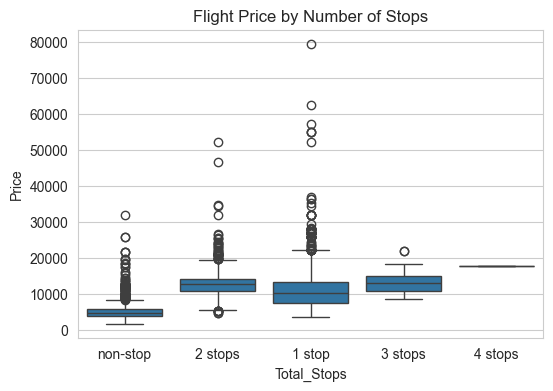

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Total_Stops", y="Price", data=data)
plt.title("Flight Price by Number of Stops")
plt.show()

- Duration

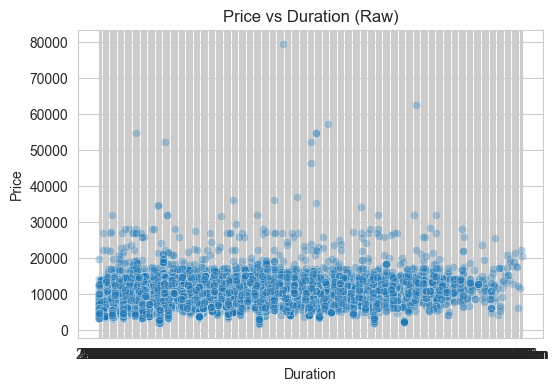

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Duration", y="Price", data=data, alpha=0.3)
plt.title("Price vs Duration (Raw)")
plt.show()

## 5. Time-Related Variables

In [10]:
data["Date_of_Journey"].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [11]:
data["Dep_Time"].head()

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

### EDA Summary

- Flight prices show a right-skewed distribution with several outliers.
- Non-stop flights are not consistently more expensive than flights with multiple stops.
- Prices show large dispersion within each stop category.
- The relationship between duration and price appears noisy, with no clear trend.
- Duration and time-related variables are stored as strings, requiring preprocessing.